<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Mason_of_LS_DS_114_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

**Objectives**

- What are continuous and categorical variables? Using pandas built-in plotting functionality.
- Learn about various types of `pandas` plots using `matplotlib`
- use `matplotlib` to visualize distributions and relationships with continuous and categorical variables
- imitate a real-world example

**What are categorical, discrete, and continuous variables?**  

* Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.  
* Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.  
* Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.  
[Source](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

In [0]:
## Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
# "fast" is actually the default style, so you don't necessarily have to set it.

In [15]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

## Part 1. The Pandas built-in visualization tool
This is useful only for simple, quick-and-dirty plots. [Read the full documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). For anything more complex you'll want to use a more robust visualization package such as `matplotlib`, `seaborn`, or `plotly`.  

"Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion." [J. Sonoma](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/)


**Continuous vs. categorical variables**

In [16]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [22]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


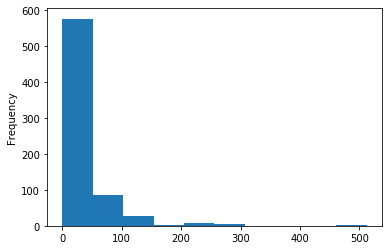

In [26]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

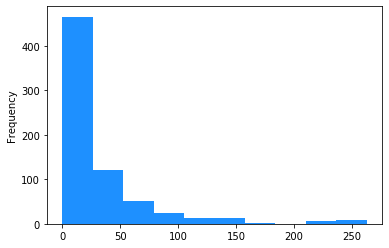

In [29]:
# Remove two extreme outliers
df=df[df['Fare']<500]

df['Fare'].plot(kind='hist', color='dodgerblue')

In [30]:
# A continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

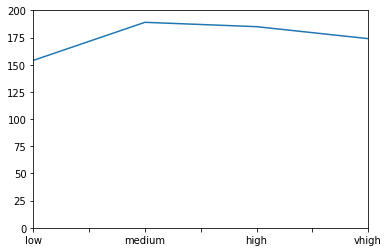

In [37]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot(ylim=(0, 200));

**Display a single continuous variable**

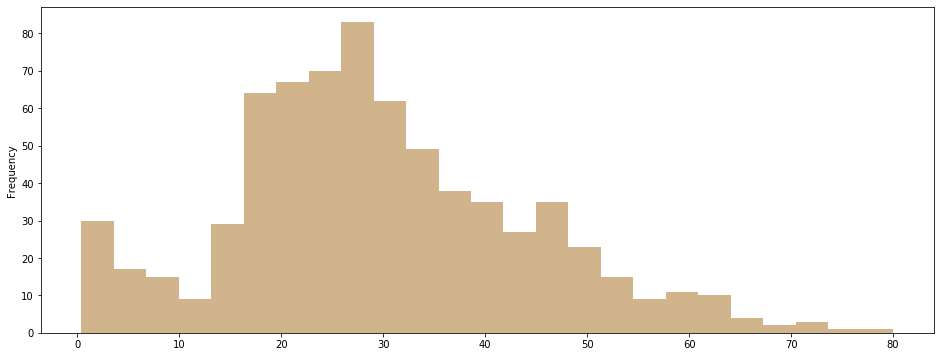

In [47]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,6), color='tan');

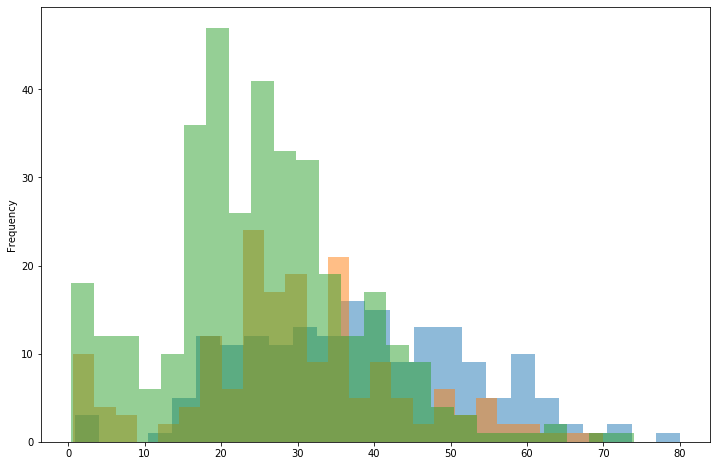

In [51]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(12,8), alpha=0.5); #alpha = transparency 
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(12,8), alpha=0.5); # copy and chagne 1,2,3 class pass
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(12,8), alpha=0.5);

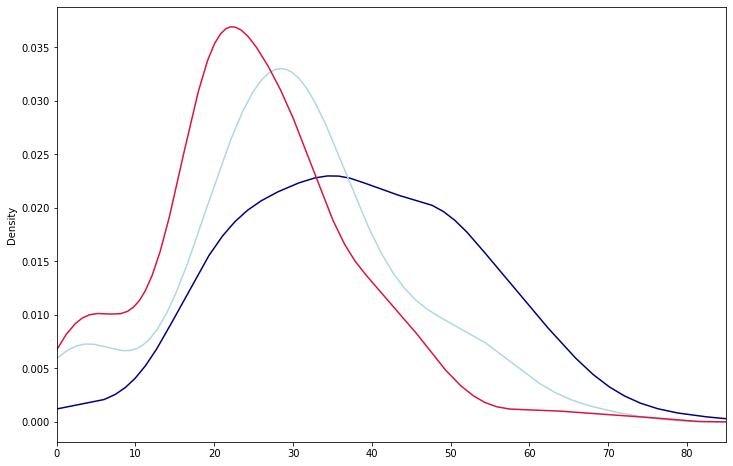

In [53]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0, 85), figsize=(12,8), color='navy'); 
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0, 85), figsize=(12,8), color='lightblue'); 
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0, 85), figsize=(12,8), color='crimson');

**Display a single categorical variable**

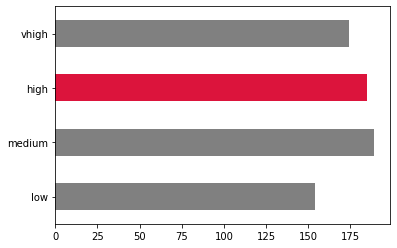

In [62]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

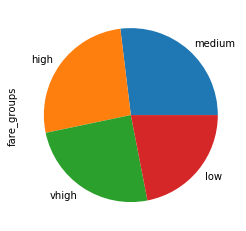

In [61]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

**Compare two categorical variables**

In [0]:
# Compare two categorical variables using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

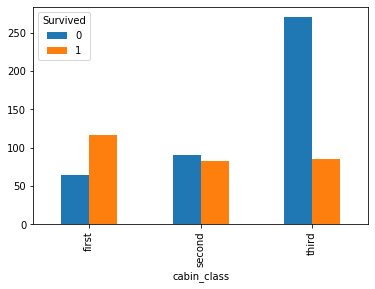

In [67]:
# Make that into a bar chart.
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents.
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

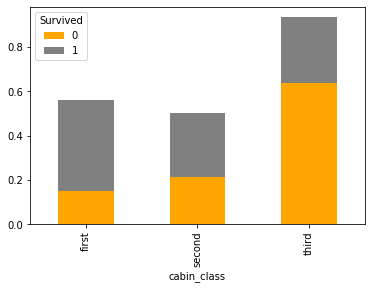

In [70]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Crosstab with column percents.
cab_survive2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')

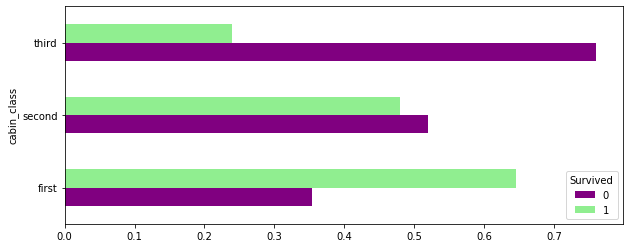

In [73]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_survive2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

**Compare a categorical and continuous variable**

In [74]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()

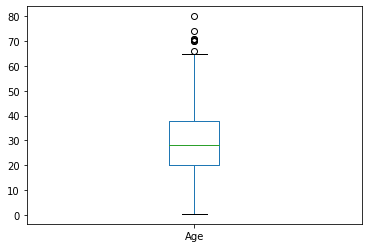

In [78]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

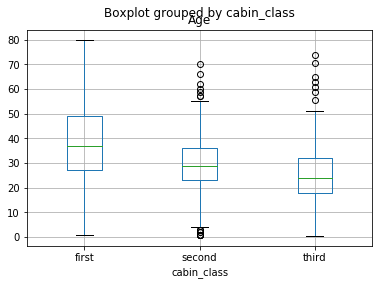

In [79]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

**Compare two or three continuous variables**

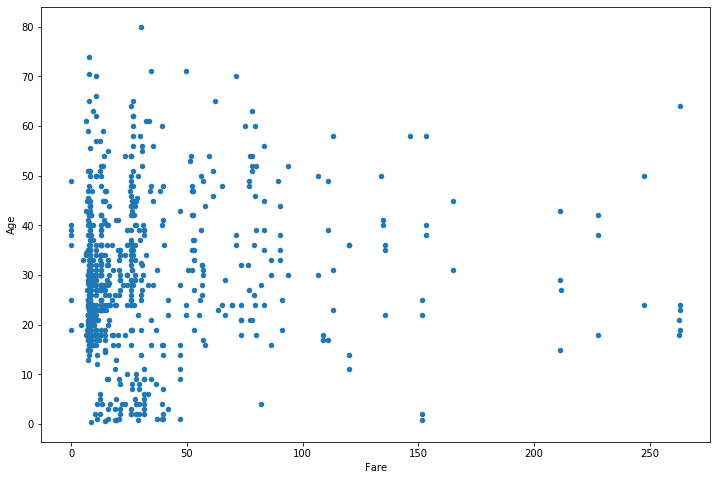

In [80]:
# Two continuous variables: age by fare
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,8));

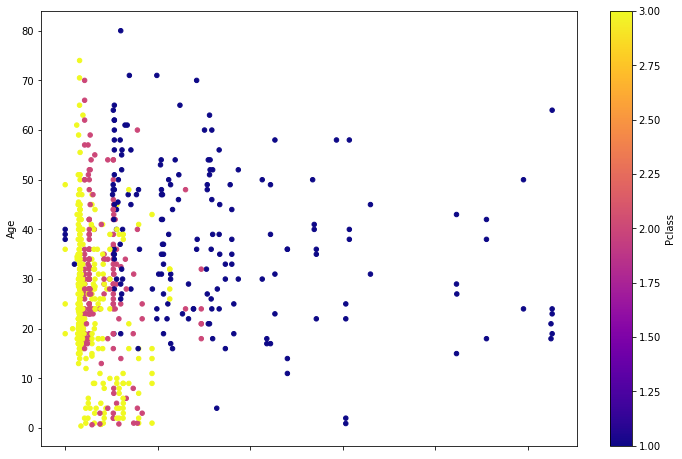

In [83]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(12,8));

**Use a line plot to examine two continuous variables (often time)**

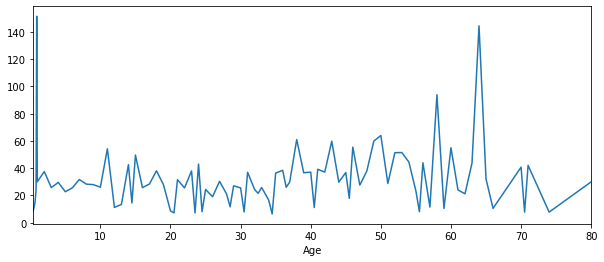

In [85]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

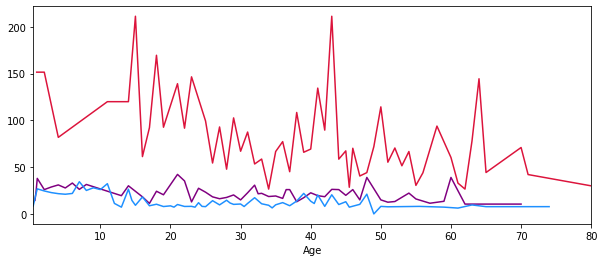

In [88]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors[x-1]); #(group)[by]

**Compare multiple continuous variables**

In [89]:
# Correlation Matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


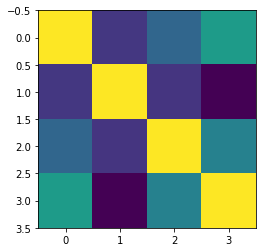

In [90]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

**But this actually is easier and better looking if you use `seaborn` code.**

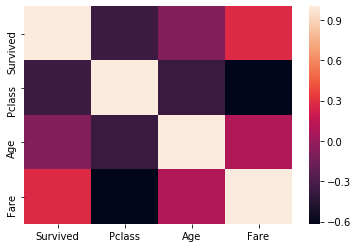

In [91]:
# Seaborn.
sns.heatmap(corr_matrix);

## Intro to `matplotlib`

**Basic example**

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x **2

In [94]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [95]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

**Basic Matplotlib Commands**

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

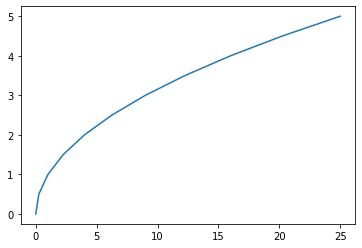

In [96]:
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

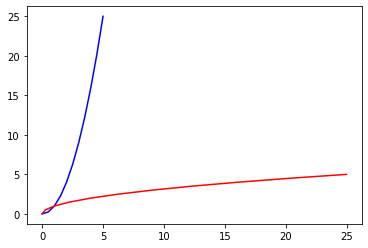

In [97]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'b')
plt.plot(y, x, 'r')

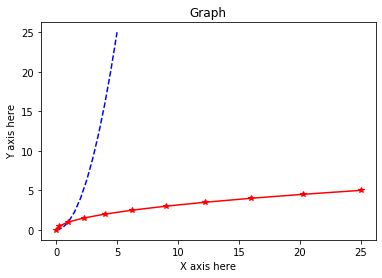

In [101]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'b--')
plt.plot(y, x, 'r*-')
plt.xlabel('X axis here')
plt.ylabel('Y axis here')
plt.title('Graph');

**Creating Multiplots on Same Canvas**

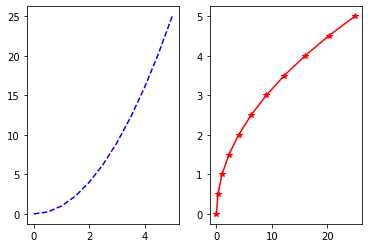

In [104]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1) # row, columns, canvas number(subplot number)
plt.plot(x, y, 'b--')
plt.subplot(1,2,2)
plt.plot(y, x, 'r*-');

___
### Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

In Matplotlib, the figure (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. We'll commonly use the variable name `fig` to refer to a figure instance, and `ax` to refer to an axes instance or group of axes instances. Once we have created an axes, we can use the `ax.plot` function to plot some data.
https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

**The `.figure()` method**  
To begin we create a figure instance. Then we can add axes to that figure:

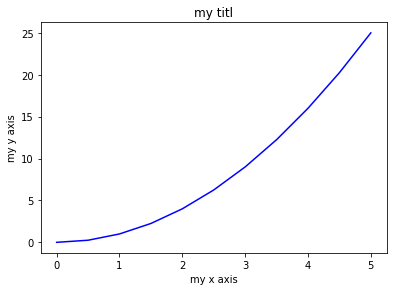

In [111]:
# Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my titl');
# Notice the use of set_ to begin methods


Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

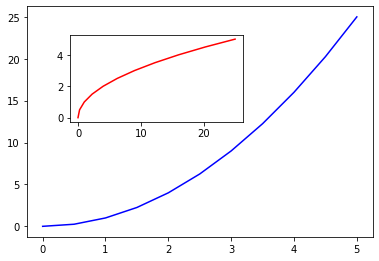

In [113]:
# Creates blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]);
# Larger Figure Axes 1
axes1.plot(x,y,'b')
# Insert Figure Axes 2
axes2.plot(y,x,'r')

**The `subplots()` method**

The `plt.subplots()` object will act as a more automatic axis manager. It is somewhat more common than using `.figure()`

`plt.subplots()` is a function that returns a tuple containing a figure and axes object(s). Thus when using `fig, ax = plt.subplots()` you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:
```
fig, ax = plt.subplots()
```
is more concise than this:
```
fig = plt.figure()
ax = fig.add_subplot(111)
```
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

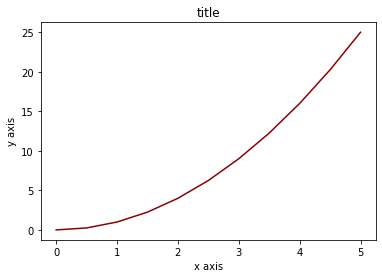

In [120]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

# The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

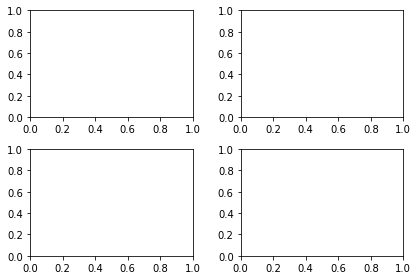

In [123]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
# the parameter labels `nrows` and `ncols` are optional.
fig.tight_layout()
# more about `.tight_layout()` below.

In [124]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8296690128>,
      dtype=object)

We can iterate through this array:

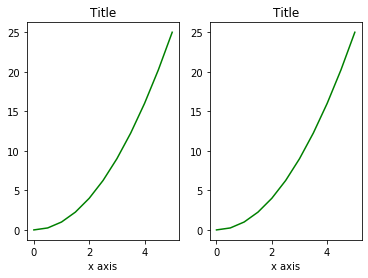

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# Display the figure object    
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('Title')

plt.tight_layout;

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [129]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

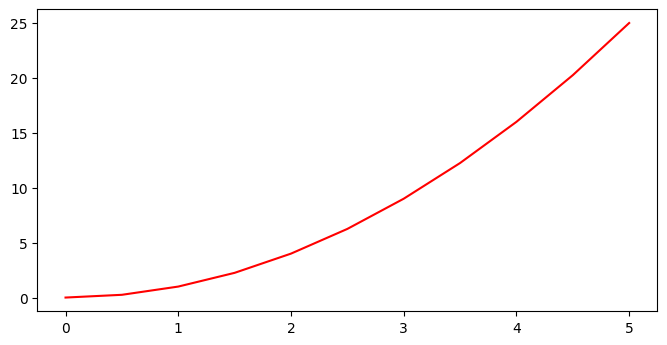

In [134]:
fig, axes, = plt.subplots(figsize=(8,4), dpi=100)
axes.plot(x, y, 'r')


## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [0]:
fig.savefig('filename.png')

Here we can also optionally specify the DPI and choose between different output formats:

In [0]:
fig.savefig('filename.png', dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [0]:
ax.set_title('my title')

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [0]:
# seen above

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

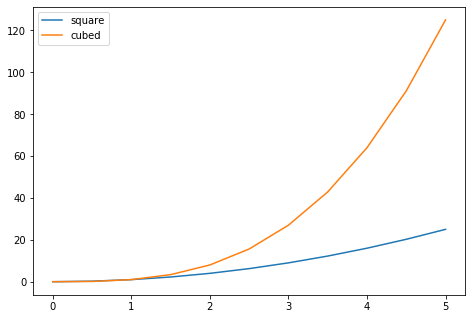

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
ax.plot(x, x**2, label="square")
ax.plot(x, x**3, label='cubed')
ax.legend();

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

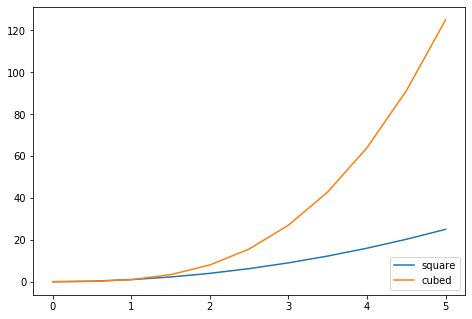

In [148]:
# Lots of options....
ax.legend(loc=4)
fig

# Try replacing the `loc` value with integers 1 through 10.
# let matplotlib decide the optimal location


## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

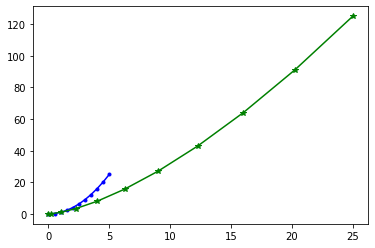

In [151]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(y, x**3, 'g*-')

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

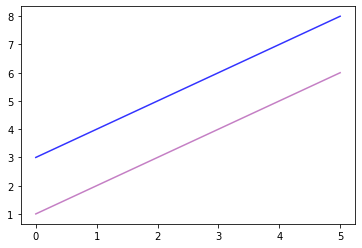

In [157]:
# half-transparant
fig, ax = plt.subplots()
# RGB hex code
ax.plot(x, x+1, color='#8B008B', alpha=0.5)
# RGB hex code 
ax.plot(x, x+3, color='blue', alpha=0.8)

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

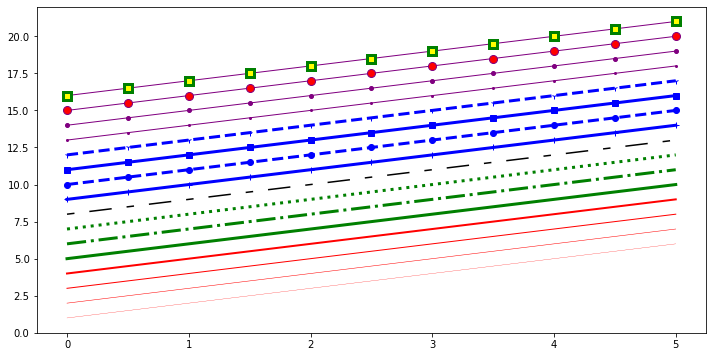

In [156]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

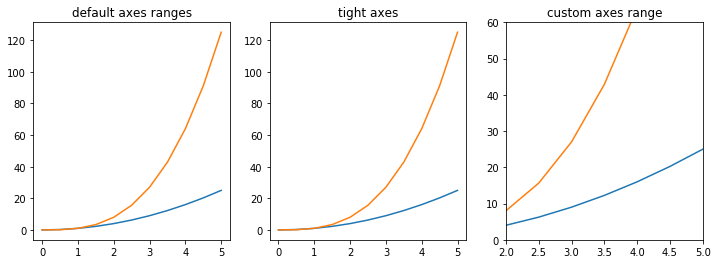

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## Imitate a real-world example

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [159]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

### Make fake prototypes

This  helps us understand the problem

In [0]:
# what styles are available in matplotlib? There's one for 538.
plt.style.available
plt.style.use('fivethirtyeight')

In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


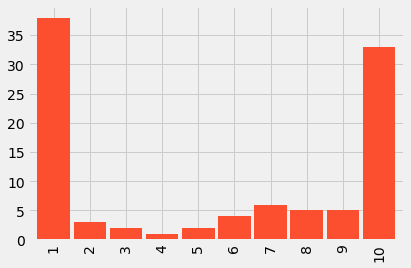

In [175]:
# replicate the figure post
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9)

In [0]:
fake2 = pd.Series(fakelist2)

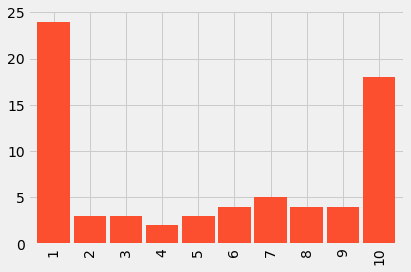

In [173]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

### Annotate with text

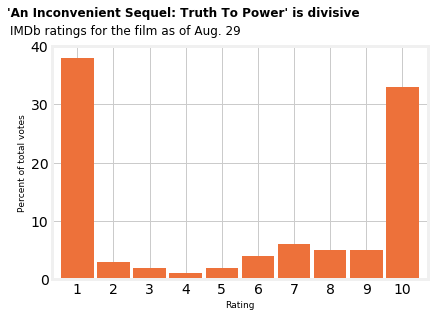

In [176]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
display(example)

### Reproduce with real data

Using this dataset relies on us making two discoveries:

1) The dataset shows logs of the data at different timestamps and these timestamps are cumulative, meaning that it has all of the ratings as earlier timestamps, but with the new ones added on top. 2) The dataset logs ratings breakdowns for a bunch of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last line that holds the ratings for all IMDb users for the very last time stamp.

In [0]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [192]:
# Convert timestamps strings to actual datetime objects
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# convert
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [197]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = lastday_filtered.tail(1)

In [199]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [200]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


**generate the figure**

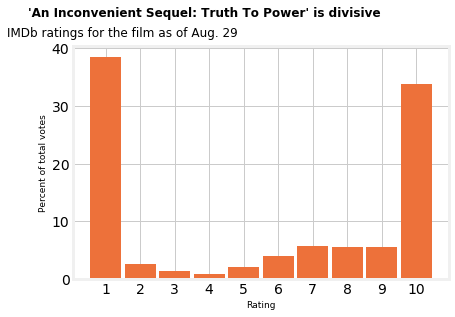

In [201]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));